In [160]:
import pandas as pd


In [161]:
agrt_ptr_filename = "../data/agrt/output/PTR.txt"
amk_ptr_filename = "../data/amk/output/PTR.txt"

In [162]:
COLUMNS_NAMES = ['PTR_AND_TEST_NUM', 'HEAD_NUM', 'SITE_NUM', 'RESULT', 'PARM_FLG', 'TEST_FLAG',
       'TEST_TXT', 'ALARM_ID', 'OPT_FLAG', 'RES_SCAL', 'LLM_SCAL', 'HLM_SCAL',
       'LO_LIMIT', 'HI_LIMIT', 'UNITS', 'C_RESFMT', 'C_LLMFMT', 'C_HLMFMT',
       'LO_SPEC', 'HI_SPEC']

raw_agrt_ptr = pd.read_csv(agrt_ptr_filename, sep="|", header=None, names=COLUMNS_NAMES)
print("Agrt shape {}".format(raw_agrt_ptr.shape))

raw_amk_ptr = pd.read_csv(amk_ptr_filename, sep="|", header=None, names=COLUMNS_NAMES)
print("Amk shape {}".format(raw_amk_ptr.shape))


/home/cedric/miniconda3/envs/env_stdf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.



Agrt shape (3484604, 20)
Amk shape (3108974, 20)


In [163]:

def split_ptr_and_test_num_column(input_df):
    
    input_df_clean = input_df.copy()
    input_df_clean[['PTR','TEST_NUM']] = input_df_clean.PTR_AND_TEST_NUM.str.split(":",expand=True)
    input_df_clean = input_df_clean.drop("PTR_AND_TEST_NUM", axis=1)
    columns = ['PTR','TEST_NUM'] + list(input_df_clean.columns[:-2]) # Reaarange cols
    input_df_clean = input_df_clean[columns]
    
    return(input_df_clean)

agrt_ptr = split_ptr_and_test_num_column(raw_agrt_ptr)
amk_ptr = split_ptr_and_test_num_column(raw_amk_ptr)


In [164]:
# agrt_ptr.describe()

In [165]:
# amk_ptr.describe()

In [166]:
SELECTED_TEST_NUM = ['53120','71300','76511']
selected_amk_ptr = amk_ptr[amk_ptr['TEST_NUM'].isin(SELECTED_TEST_NUM)].copy().reset_index(drop=True)
selected_agrt_ptr = agrt_ptr[agrt_ptr['TEST_NUM'].isin(SELECTED_TEST_NUM)].copy().reset_index(drop=True)

In [167]:
print("number of selected line agrt: {}".format(selected_agrt_ptr.shape))
print("number of selected line amk: {}".format(selected_amk_ptr.shape))


number of selected line agrt: (2264, 21)
number of selected line amk: (2334, 21)


In [168]:
# selected_agrt_ptr[["TEST_NUM", "HEAD_NUM", "SITE_NUM", "RESULT", "HLM_SCAL"]].head()

In [169]:
# sort by test_num and 
# selected_agrt_ptr[(selected_agrt_ptr.TEST_NUM=='53120') \
#                 & (selected_agrt_ptr.HEAD_NUM==1) \
#                  & (selected_agrt_ptr.SITE_NUM==3)]

In [171]:
# Joined both selected data
selected_amk_ptr["FACTORY"] = ["AMK"]*selected_amk_ptr.shape[0]
selected_agrt_ptr["FACTORY"] = ["AGRT"]*selected_agrt_ptr.shape[0]
joined_selected_data = pd.concat([selected_agrt_ptr, selected_amk_ptr], ignore_index=True)

In [172]:
joined_selected_data = joined_selected_data.sort_values(by=["TEST_NUM", "SITE_NUM", "RESULT"]).reset_index(drop=True)
# SELECTED_TEST_NUM = ['53120','71300','76511']


In [173]:
amk_ptr.HEAD_NUM.unique()

array([1])

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [156]:
print(g.axes)

[<AxesSubplot:title={'center':'SITE_NUM = 1'}>
 <AxesSubplot:title={'center':'SITE_NUM = 2'}>
 <AxesSubplot:title={'center':'SITE_NUM = 3'}>
 <AxesSubplot:title={'center':'SITE_NUM = 4'}>
 <AxesSubplot:title={'center':'SITE_NUM = 5'}>
 <AxesSubplot:title={'center':'SITE_NUM = 6'}>
 <AxesSubplot:title={'center':'SITE_NUM = 7'}>
 <AxesSubplot:title={'center':'SITE_NUM = 8'}>]


Text(0.5, 0.98, 'Result Density for TEST_NUM=53120 by SITE_NUM')

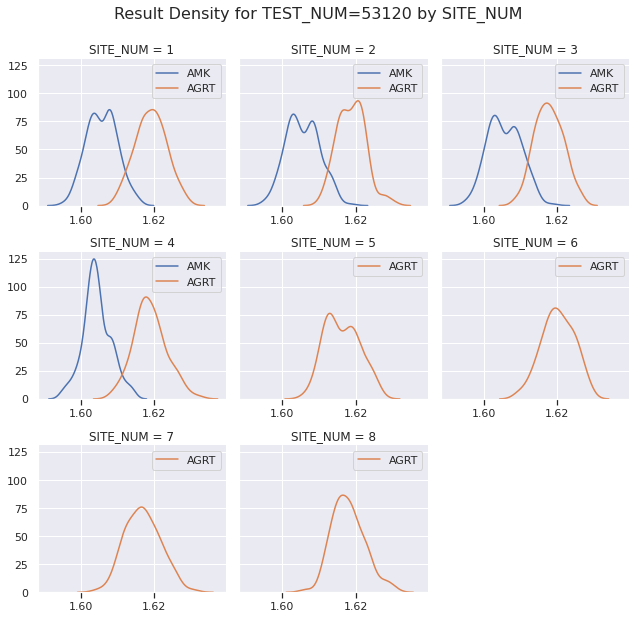

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
# SELECTED_TEST_NUM = ['53120','71300','76511']
test_num = "53120"
data_to_plot = joined_selected_data[joined_selected_data.TEST_NUM==test_num].reset_index(drop=True)
g = sns.FacetGrid(data_to_plot,\
                  col="SITE_NUM", col_wrap=3, height=3, hue="FACTORY")
g.map(sns.kdeplot, "RESULT", legend="full")

for ax in g.axes:
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xlabel("")
    ax.legend()
    
#g.add_legend()
plt.subplots_adjust(top=0.9)
plt.suptitle("Result Density for TEST_NUM={} by SITE_NUM".format(test_num), fontsize = 16)

#g.fig.suptitle("Result Density for TEST_NUM={} by SITE_NUM".format(test_num), x=0.5, y=1)

In [106]:
joined_selected_data.SITE_NUM.unique()

array([2, 3, 5, 6, 1, 4, 7, 8])

# OLD

# A link between physical data and STDF Conceptual Model

<img src="images/STDF 1 Eq.png" alt="STDF 1 Eq" style="width: 1000px;"/>
<img src="images/STDF 2 Process state.png" alt="STDF 2 Process state" style="width: 1000px;"/>

In [ ]:
probe_card_columns = [
    SDR.'CARD_TYPE',
    SDR.'CARD_ID',
    'parallelism'
]

load_board_columns = [
    SDR.'LOAD_ID',
    SDR.'LOAD_TYPE'
]

wafer_columns = [
    MIR.'SBLOT_ID', # Wafer number
    WIR.'WAFER_ID'
]

tester_columns = [
    'setup_time',
    MIR.'FLOOR_ID', # 'test_floor id',
    MIR.'PROC_ID', # Test proc ID
    'name',
    'tester_software_type',
    'tester_software_version',
    MIR.'SERL_NUM', # Tester serial number
    'Tester ope interface version', # GDR
    ### Supplement
    MIR.'NODE_NAM', # Hostname
    MIR.'Tester_Model',
    
]

prober_columns = [
    'setup_time',
    MIR.'SETUP_ID'
    'test_floor',
    'name',
    'driver_name'
]

flow_id_columns = [
    MIR.'FLOW_ID', #  (EWSn, FTn, QAn, VIn ...)
    MIR.'OPER_FRQ', # Operation Number
    'FWStep' # (TEST_HOT_01)
]

product_columns = [
    MIR.'DSGN_REV', # cam_product
    'DIE_CODE', # (part_type)
    'Package type',
    'familyid','
    MIR.'ROM_COD',
    'Part_Type'
    MIR.'ENG_ID', # Source_Lot ID
]

lot_columns = [
    'cam_product', # (Dsgn_rev), 
    'DIE_CODE', # (part_type)
    'Package type',
    'familyid','
    'ROM cod',
    'Wafer size',
    'Die_stepX/Y',
    'LOT_ID',
]

die_columns = [
    'cam_product', # (Dsgn_rev), 
    'DIE_CODE', # (part_type)
    'Package type',
    'FAMLY_ID','
    'ROM cod',
    'coordinates',
    'Part_Id', # (prr.part_id)
    'Site Nb',
    'pin'
]

part_columns = [
    'cam_product', # (Dsgn_rev), 
    'DIE_CODE', # (part_type)
    MIR.'PKG_TYP', # Package type
    MIR.'FAMLY_ID','
    'ROM cod',
    'Part_Id', # (prr.part_id)
    'Site_Nb',
    'ULT_2Dcode' # (in prr.part_txt)
]

test_program_columns = [
    MIR.'Test_Mode_Code' # (P/E/M…)
    MIR.'EXEC_TYP', # tester_software_type
    MIR.'EXEC_VER', # tester_software_version
    MIR.'JOB_NAM', # Job-Name
    MIR.'JOB_REV', # Job-revision
    MIR.'SPEC_NAM', # Spec-Name
    MIR.'SPEC_VER', 'Spec-version',
    MIR.'SUPR_NAM', # Test program owner
    MIR.'OPER_NAM', # Operator Name, necessary ?? (RGPD)
]

prober_setup_columns = [
    'Test mode code' # (P/E/M…)
    'tester_software_type',
    'tester_software_version', # (Dual boot ?)
    'name',
    'parallelism',
    SDR.'SITE_CNT',
    SDR.'SITE_NUM'
]

ptr_columns = [
    'test-name',
    'test-number',
    'type',
    'version',
    'test-unit',
    'low-spec-limit',
    'high-spec-limit',
    'low-test-limit',
    'high-test-limit'
]

mpr_columns = [
    'test-name',
    'test-number',
    'type',
    'version', # Version par test limit ou global ?
    'test-unit',
    'low-spec-limit',
    'high-spec-limit',
    'low-test-limit',
    'high-test-limit', 
    'pin'
]

ftr_columns = [
    'test-name',
    'test-number',
    'type',
    'version', # Version par test limit ou global ?
    'test-unit',
    'pin'
]

measurement_result_columns = [
    'id',
    'Value';
    'Parameter_PassFail', # (Pass, Fail)
    MIR.'START_T', #'test_start_date'
    'test_finish_date', #()
    'Alarm_id',
    'Timeout',
    'abort',
    'test-duration',
    'Inline retest version' # ??
]

process_state_columns = [
    'Product',
    'Machine',
    'Step',
    MIR.'SETUP_T', # Setup time
    'Over travel',
    MIR.'TST_TEMP', # Measured Temperature value
    'Test-Decision',
    'DUT_PassFail' # (Pass, Fail)
    'Hard BIN', 
    'Number',
    'HB name',
    'HB P/F',
    'Soft BIN',
    'Number',
    'SB name',
    'SB P/F',
    'STATUS', 
    'CMOD_COD' #? (test, retest, ...) ?
]

In [ ]:
agrate = STDF2DataFrame(file1)

In [ ]:
amk_ptr = pd.read_csv("../data/poc_stdf/ewta/PTR.txt", sep="|", header=None, names=['PTR','TEST_NUM', 'HEAD_NUM', 'SITE_NUM', 'TEST_FLG', 'PARM_FLG', 'RESULT',
       'TEST_TXT', 'ALARM_ID', 'OPT_FLAG', 'RES_SCAL', 'LLM_SCAL', 'HLM_SCAL',
       'LO_LIMIT', 'HI_LIMIT', 'UNITS', 'C_RESFMT', 'C_LLMFMT', 'C_HLMFMT',
       'LO_SPEC', 'HI_SPEC'])

In [ ]:
agrate_ptr_from_txt = pd.read_csv("../data/poc_stdf/agrate/PTR.txt", sep="|", header=None, names=['PTR','TEST_NUM', 'HEAD_NUM', 'SITE_NUM', 'TEST_FLG', 'PARM_FLG', 'RESULT',
       'TEST_TXT', 'ALARM_ID', 'OPT_FLAG', 'RES_SCAL', 'LLM_SCAL', 'HLM_SCAL',
       'LO_LIMIT', 'HI_LIMIT', 'UNITS', 'C_RESFMT', 'C_LLMFMT', 'C_HLMFMT',
       'LO_SPEC', 'HI_SPEC'])

In [ ]:
agrate = rousset.copy()
agrate_ptr = agrate['PTR'].copy()


In [ ]:
selected_amk_ptr = amk_ptr[amk_ptr['TEST_NUM'] in [53120,71300,76511]].copy()
selected_agrate_ptr = agrate_ptr[agrate_ptr['TEST_NUM'] in [53120,71300,76511]].copy()

In [ ]:
amk_ptr

In [ ]:
agrate.keys()

In [ ]:
agrate_ptr_from_txt[agrate_ptr_from_txt['TEST_NUM']=='71300']

In [ ]:
amk_ptr[amk_ptr['TEST_NUM']=='71300']

In [ ]:
max(amk_ptr.groupby(by=['TEST_NUM'])['RESULT'].count())

In [ ]:
min(agrate_ptr.groupby(by=['TEST_NUM'])['RESULT'].count())


In [ ]:
min(agrate_ptr_from_txt.groupby(by=['TEST_NUM'])['RESULT'].count())

In [ ]:
agrate_ptr[(agrate_ptr['TEST_NUM']==107) & (agrate_ptr['SITE_NUM']==1)].sort_values('SITE_NUM').copy().reset_index(drop=True)

In [ ]:
agrate_to_graphe = agrate_ptr[(agrate_ptr['TEST_NUM']==107) & (agrate_ptr['SITE_NUM']==1)].sort_values('SITE_NUM').copy().reset_index(drop=True)

In [ ]:
agrate_ptr[(agrate_ptr['TEST_NUM']==107)]

In [ ]:
agrate_ptr_to_graphe_from_txt = agrate_ptr_from_txt[agrate_ptr_from_txt['TEST_NUM']=='107'].sort_values('SITE_NUM').copy().reset_index(drop=True)

In [ ]:
agrate_ptr[(agrate_ptr['TEST_NUM']==107) & (agrate_ptr['SITE_NUM']==7)].sort_values('SITE_NUM').copy().reset_index(drop=True)

In [ ]:
agrate_ptr_to_graphe_from_txt

In [ ]:
# Group by test results => disitribution entre les 2 usines 


from bqplot import pyplot as plt

plt.plot(agrate_ptr_to_graphe_from_txt.index, agrate_ptr_to_graphe_from_txt['RESULT'], labels = ["agrate_to_graphe"], colors=["red"])
plt.plot(Rousset_MFC_Flow_Ar_heater.index, Rousset_MFC_Flow_Ar_heater['value'], labels = ["Rousset_MFC_Flow_Ar_heater"])
plt.xlabel('??')
plt.ylabel('??')

plt.title('??')
plt.legend()
plt.show()

In [ ]:
plt.clear()

In [ ]:
# Bin : PRR récupérer les colonnes Hard/Soft bin (pareto de bin) => comparer les pareto